In [45]:
from keras.datasets import boston_housing
import pandas as pd
import numpy as np

In [46]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()


In [47]:
X = np.vstack((X_test, X_train))
y = np.hstack((y_test, y_train))
df1 = pd.DataFrame(X)
df2 = pd.DataFrame(y)

In [48]:
df = pd.concat([df1, df2], axis=1)
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
              'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,18.08460,0.0,18.10,0.0,0.6790,6.434,100.0,1.8347,24.0,666.0,20.2,27.25,29.05,7.2
1,0.12329,0.0,10.01,0.0,0.5470,5.913,92.9,2.3534,6.0,432.0,17.8,394.95,16.21,18.8
2,0.05497,0.0,5.19,0.0,0.5150,5.985,45.4,4.8122,5.0,224.0,20.2,396.90,9.74,19.0
3,1.27346,0.0,19.58,1.0,0.6050,6.250,92.6,1.7984,5.0,403.0,14.7,338.92,5.50,27.0
4,0.07151,0.0,4.49,0.0,0.4490,6.121,56.8,3.7476,3.0,247.0,18.5,395.15,8.44,22.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.21977,0.0,6.91,0.0,0.4480,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20,19.4
502,0.16211,20.0,6.96,0.0,0.4640,6.240,16.3,4.4290,3.0,223.0,18.6,396.90,6.59,25.2
503,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83,19.4
504,2.14918,0.0,19.58,0.0,0.8710,5.709,98.5,1.6232,5.0,403.0,14.7,261.95,15.79,19.4


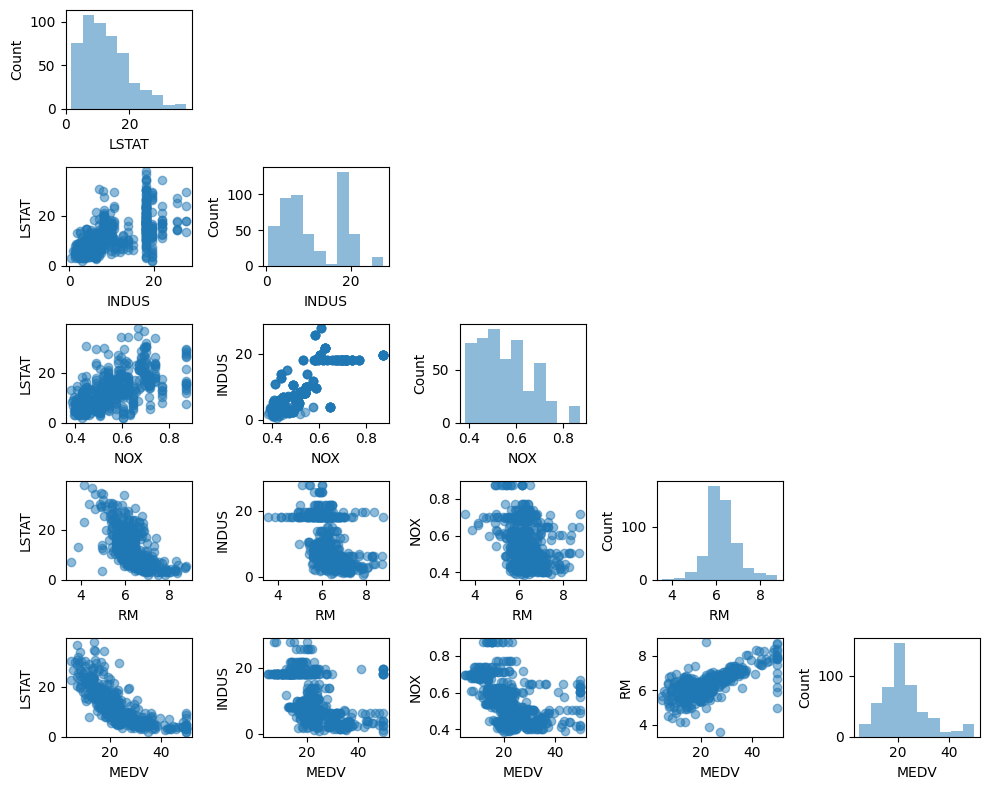

In [49]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
scatterplotmatrix(df[cols].values, figsize=(10, 8),
                  names=cols, alpha=0.5)
plt.tight_layout()

In [50]:
#можно сделать вывод о линейной зависимости между RM и MEDV
#medv имеет нормальное распределение, но с выбросами

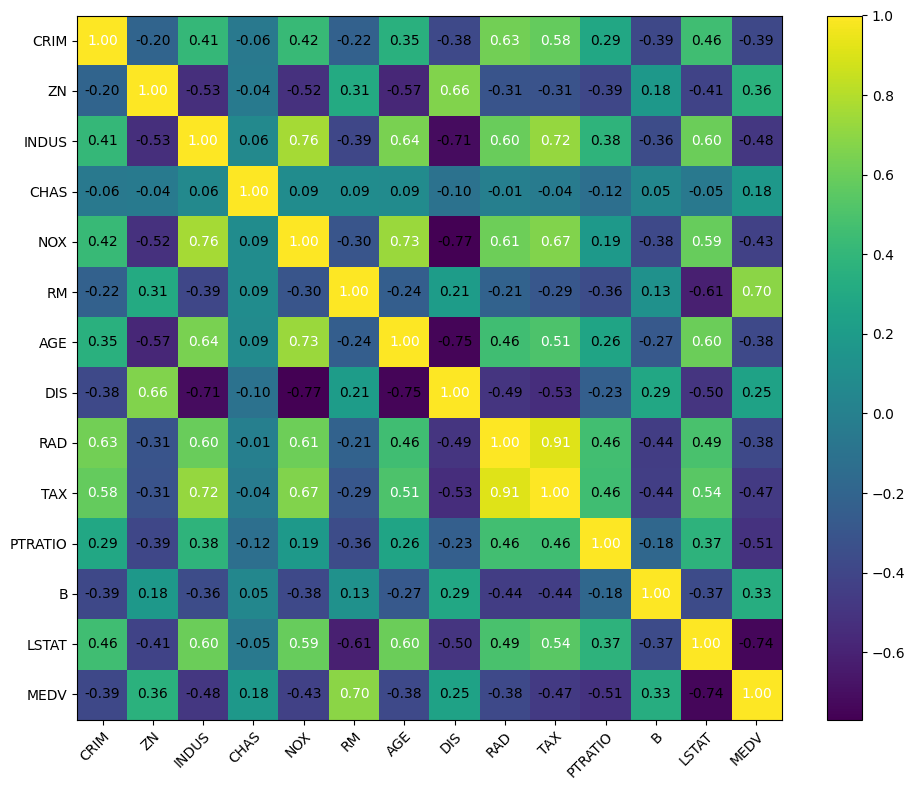

In [51]:
from mlxtend.plotting import heatmap
import numpy as np
cm = np.corrcoef(df.values.T)
hm = heatmap(cm,
             row_names=df.columns,
             column_names=df.columns,
             figsize=(10,8))
plt.tight_layout()
#коряллеационная матрица

In [52]:
class LinearRegressionGD(object):
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = y - output
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """вычисляем общий вход"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)
    



In [53]:
X = df[['RM']].values
y = df['MEDV'].values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()#делаем у двумерным массивом с помощью np.newaxis, а затем возвращаем обратно в одномерный с помощью flatten()
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

Text(0, 0.5, 'SSE')

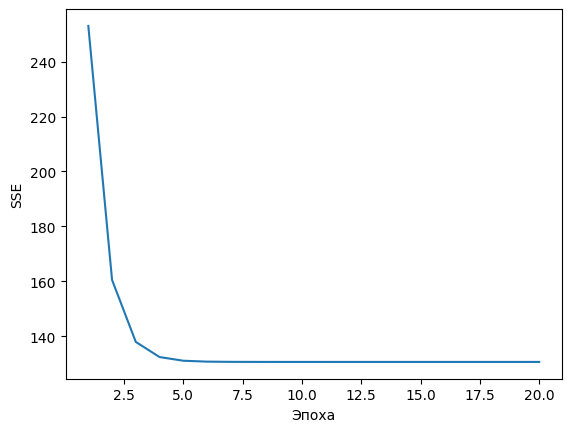

In [54]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.xlabel('Эпоха')
plt.ylabel('SSE')


Text(0, 0.5, 'Цена в тыс. долларов [MEDV] (стандартизированная)')

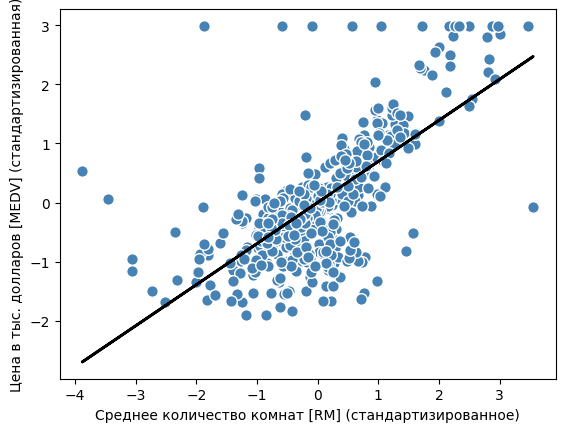

In [55]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return None

lin_regplot(X_std, y_std, lr)
plt.xlabel('Cpeднee количество комнат [RМ] (стандартизированное)')
plt.ylabel('Цена в тыс. долларов [MEDV] (стандартизированная)')

In [56]:
num_rooms_std = sc_x.transform(np.array([[5.0]]))
price_std = lr.predict(num_rooms_std)
print(sc_y.inverse_transform([price_std]))

[[10.83993289]]


In [57]:
lr.w_#первый коэф примерно 0, т.е. прямая выходит из точки (0, 0) из-за того что мы стандартизировали данные

array([3.04645198e-16, 6.95359426e-01])

In [58]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)#лучше работает с нестандартизированными переменными
y_pred = slr.predict(X)
slr.coef_[0]

9.10210898118031

In [59]:
slr.intercept_

-34.67062077643857

Text(0, 0.5, 'Цена в тыс. долларов [MEDV] (стандартизированная)')

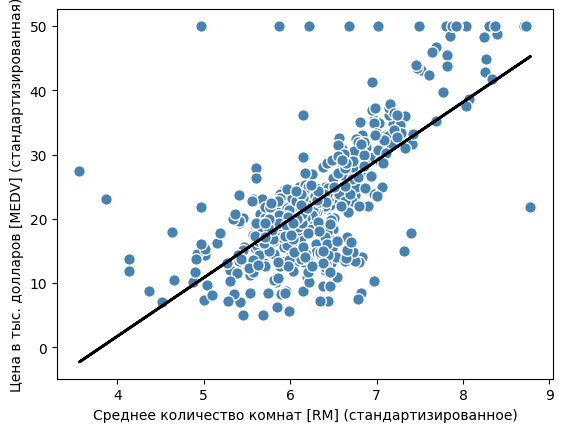

In [60]:
lin_regplot(X, y, slr)
plt.xlabel('Cpeднee количество комнат [RМ] (стандартизированное)')
plt.ylabel('Цена в тыс. долларов [MEDV] (стандартизированная)')

In [61]:
#те же самые значения можно получить и аналитически, а не итерационно
Xb = np.hstack((np.ones((X.shape[0], 1)), X))
w = np.zeros(X.shape[1])
z = np.linalg.inv(np.dot(Xb.T, Xb))
w = np.dot(z, np.dot(Xb.T, y))
w[1]

9.102108981180233

In [62]:
w[0]

-34.67062077643839

In [63]:
#избегание выбросов - RANSAC
#1) выбрать случайное кол-во образцов - не выбросы
#2) проверить остальные точки на модели и добавить то что не выбросы
#3) подогнать модель на не выбросах
#4) оценить ошибку относительно не выбросов
#5) закончить алгоритм если критерий останова иначе шаг 1

In [64]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(),
                         max_trials=100,#максимальное количество итераций
                         min_samples=50,#минимальное число случайно выбранных обучающих образцов
                         loss='absolute_error',#модуль расстояния
                         residual_threshold=5.0,#не выбросы - расстояние по вертикали до прямой меньше 5
                         random_state=0)
ransac.fit(X, y)

RANSACRegressor(estimator=LinearRegression(), min_samples=50, random_state=0,
                residual_threshold=5.0)

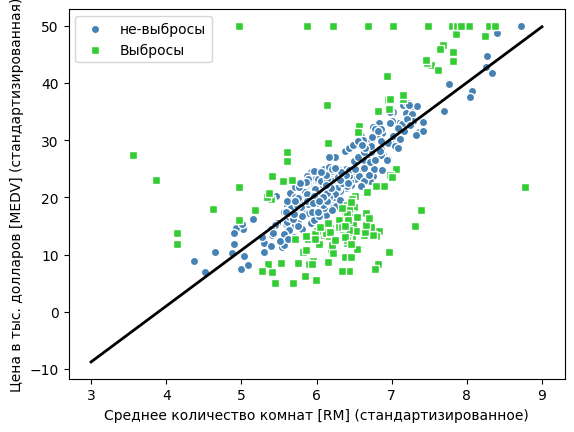

In [65]:
inlier_mask = ransac.inlier_mask_
outliner_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white',
            marker='o', label='не-выбросы')
plt.scatter(X[outliner_mask], y[outliner_mask],
            c='limegreen', edgecolor='white',
            marker='s', label='Выбросы')
plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('Cpeднee количество комнат [RМ] (стандартизированное)')
plt.ylabel('Цена в тыс. долларов [MEDV] (стандартизированная)')
plt.legend(loc='best')

In [66]:
ransac.estimator_.coef_[0]

9.770304217330724

In [67]:
ransac.estimator_.intercept_

-38.08022153487853

In [68]:
y_train.shape

(404,)

In [69]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

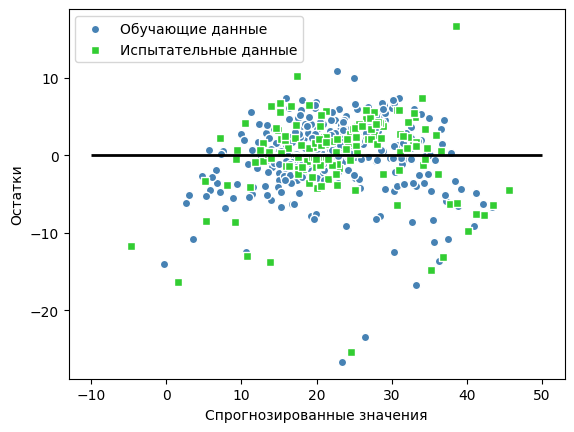

In [70]:
plt.scatter(y_train_pred, y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Обучающие данные')
plt.scatter(y_test_pred, y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Испытательные данные')
plt.xlabel('Спрогнозированные значения')
plt.ylabel('Остатки')
plt.legend(loc = 'best')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
#если на графике повторяющиеся шаблоны - модель не захватывает информацию из данных
#также можно использовать для поиска выбросов

In [71]:
#метрика MSE - среднеквадратическая ошибка, удобна для сравнения, настройки параметров
from sklearn.metrics import mean_squared_error
print(f'MSE при обучении - {mean_squared_error(y_train, y_train_pred)}, при испытании - {mean_squared_error(y_test, y_test_pred)}')

MSE при обучении - 20.480074871150247, при испытании - 25.721296751152174


In [72]:
from sklearn.metrics import r2_score
#стандартизированная версия MSE
print(f'R^2 при обучении - {r2_score(y_train, y_train_pred)}, при испытании - {r2_score(y_test, y_test_pred)}')

R^2 при обучении - 0.7466406883889665, при испытании - 0.7222023401171722


In [73]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=0.1)
elnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [74]:
from sklearn.preprocessing import PolynomialFeatures
X = np.array([ 258.0, 270.0, 294.0, 320.0, 342.0,
368.0, 396.0, 446.0, 480.0, 586.0])[:, np.newaxis]
y= np.array([ 236.4, 234.4, 252.8, 298.6, 314.2,
342.2, 360.8, 368.0, 391.2, 390.8])
lr = LinearRegression ()
pr = LinearRegression ()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

In [75]:
y.shape

(10,)

In [76]:
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

In [77]:
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

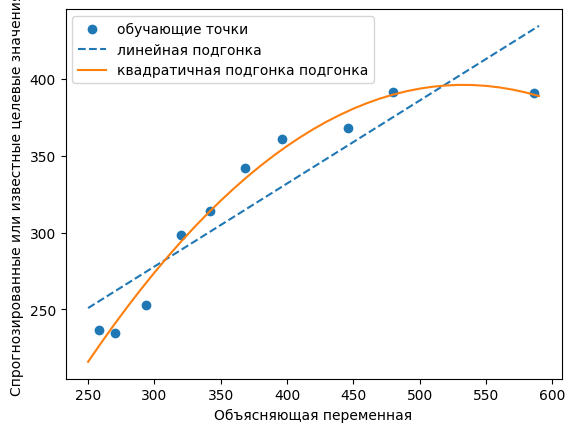

In [78]:
plt.scatter(X, y, label = 'обучающие точки')
plt.plot(X_fit, y_lin_fit,
         label = 'линейная подгонка', linestyle = '--')
plt.plot(X_fit, y_quad_fit,
         label = 'квадратичная подгонка подгонка')
plt.xlabel ('Объясняющая переменная')
plt.ylabel('Спрогнозированные или известные целевые значения')
plt.legend(loc='upper left')

In [79]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)
print(f'MSE при обучении линейной регрессии - {mean_squared_error(y, y_lin_pred)}, при обучении квадратичной - {mean_squared_error(y, y_quad_pred)}')
print(f'R^2 при обучении линейной регрессии - {r2_score(y, y_lin_pred)}, при испытании квадратичной - {r2_score(y, y_quad_pred)}')

MSE при обучении линейной регрессии - 569.7796663183207, при обучении квадратичной - 61.33021451744755
R^2 при обучении линейной регрессии - 0.8317053837891232, при испытании квадратичной - 0.9818850241163605


In [80]:
X = df[['LSTAT']].values
y = df['MEDV'].values

In [81]:
regr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

In [82]:
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

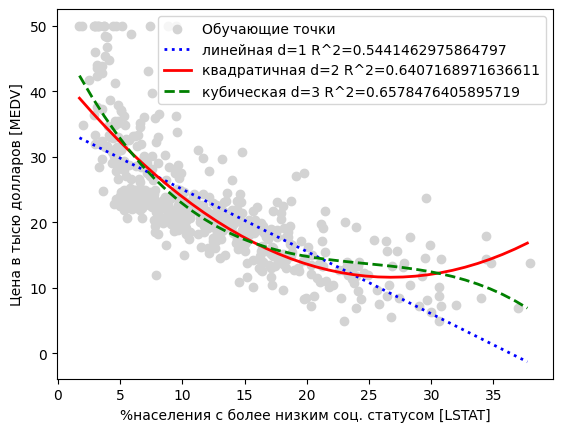

In [83]:
plt.scatter(X, y, label = 'Обучающие точки', color = 'lightgray')
plt.plot(X_fit, y_lin_fit, label=f'линейная d=1 R^2={linear_r2}',
         color = 'blue', lw=2, linestyle=':')
plt.plot(X_fit, y_quad_fit, label=f'квадратичная d=2 R^2={quadratic_r2}',
         color = 'red', lw=2, linestyle='-')
plt.plot(X_fit, y_cubic_fit, label=f'кубическая d=3 R^2={cubic_r2}',
         color = 'green', lw=2, linestyle='--')

plt.xlabel('%населения с более низким соц. статусом [LSTAT]')
plt.ylabel('Цена в тысю долларов [MEDV]')
plt.legend(loc='best')

Text(0, 0.5, 'sqrt(Цена в тысю долларов [MEDV])')

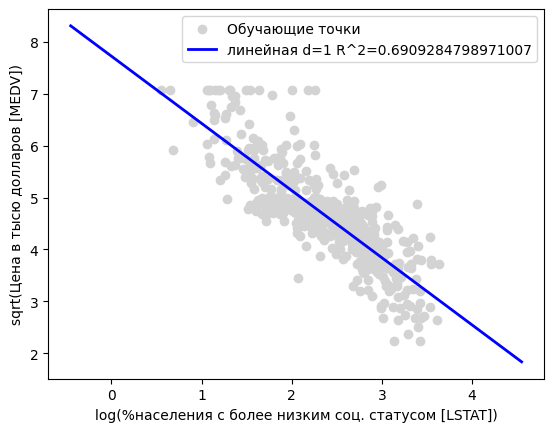

In [84]:
X_log = np.log(X)
y_sqrt = np.sqrt(y)

X_fit = np.arange(X_log.min() - 1, X_log.max() + 1,
                  1)[:, np.newaxis]
regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))
plt.scatter(X_log, y_sqrt, label = 'Обучающие точки', color = 'lightgray')
plt.plot(X_fit, y_lin_fit, label=f'линейная d=1 R^2={linear_r2}',
         color = 'blue', lw=2)
plt.legend()
plt.xlabel('log(%населения с более низким соц. статусом [LSTAT])')
plt.ylabel('sqrt(Цена в тысю долларов [MEDV])')

In [85]:
#для регрессии, если используем деревья, то мера загрязненности узла - MSE,
#где предсказанное значение - среднее в узле

Text(0, 0.5, 'Цена в тысю долларов [MEDV]')

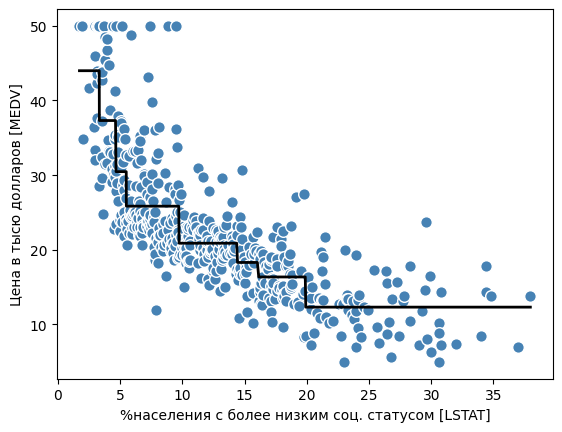

In [86]:
from sklearn.tree import DecisionTreeRegressor
x = df[['LSTAT']].values
y = df['MEDV'].values
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)
sort_idx = X.flatten().argsort()
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('%населения с более низким соц. статусом [LSTAT]')
plt.ylabel('Цена в тысю долларов [MEDV]')

In [88]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1)

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=1000,
                               criterion='squared_error',
                               random_state=1,
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
print(f'MSE при обучении - {mean_squared_error(y_train, y_train_pred)},  при испытании - {mean_squared_error(y_test, y_test_pred)}')
print(f'R^2 при обучении - {r2_score(y_train, y_train_pred)},  при испытании - {r2_score(y_test, y_test_pred)}')

MSE при обучении - 2.0419109965346434,  при испытании - 9.47757257566503
R^2 при обучении - 0.97564082124797,  при испытании - 0.8888913432182709


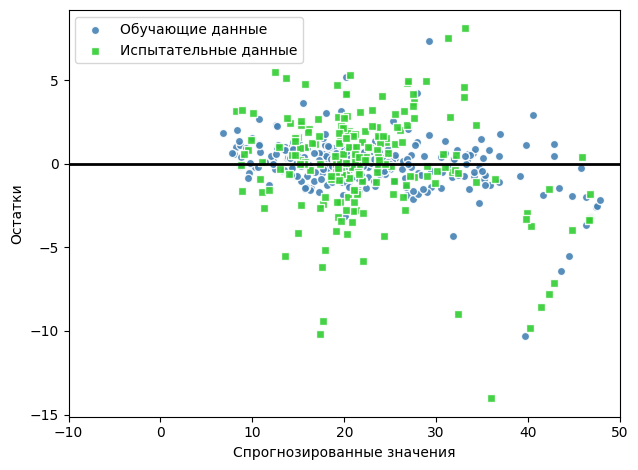

In [92]:
plt.scatter(y_train_pred, y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Обучающие данные', s = 35, alpha = 0.9)
plt.scatter(y_test_pred, y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Испытательные данные', s = 35, alpha = 0.9)
plt.xlabel('Спрогнозированные значения')
plt.ylabel('Остатки')
plt.legend(loc = 'best')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.tight_layout()
plt.xlim([-10, 50])
plt.show()
